In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as mpatches
import lzma

pd.options.display.max_rows = 100
plt.style.use('ggplot')

In [2]:
def getDataOld(filename):
    data = pd.read_csv(filename, names=['method', 'file', 'status', 'inf_input', 'quant_input', 'cuts_in', 'inf_output', 
                                        'quant_output', 'termset', 'mingrammar', 'num_mingrammars', 'can_sol', 'min_sol', 
                                        'time_termset', 'time_dtable', 'time_grammar', 'time_minsol', 'time_prcons', 
                                        'time_cleanproof'])
    data = data.replace(" ", -1)
    data = data.replace(-1, np.nan)
    data = data.replace('-1', np.nan)
    
    # Setting the correct datatypes
    columns = set(data.keys())
    integer_columns = [c for c in columns if c not in ['method', 'file', 'status']]
    for c in integer_columns:
        data[c] = data[c].astype(np.float)
        
    method_map = {
        'one_cut_one_quant': '1_dtable',
        'one_cut_many_quants': 'many_dtable',
        'many_cuts_one_quant_1': '1_maxsat',
        'many_cuts_one_quant_2': '1_1_maxsat',
    }
    data['method'] = data['method'].astype(str).map(method_map)
    data['file'] = data['file'].astype(str)
    data['status'] = data['status'].astype(str)
    
    # Adding a column for the database
    def getDB (s):
        if 'ExampleProof' in s:
            return 0
        elif 'testing/TSTP' in s:
            return 1
        elif 'testing/veriT' in s:
            return 2
        else:
            return -1
    data['db'] = data.file.apply(getDB)
    
    return data

def getData(file):
    if file.endswith('.xz'): file = lzma.open(file, 'rt')
    data = pd.read_json(file)
    data = data.sort_values(['file', 'method'])
    
    # Adding a column for the database
    data['db'] = -1 + \
        (0+1)*data.file.str.endswith(')') + \
        (1+1)*data.file.str.contains('/Prover9--') + \
        (2+1)*data.file.str.contains('/E---1') + \
        (3+1)*data.file.str.contains('/leanCoP--') + \
        (4+1)*data.file.str.contains('/QF_UF/')
    
    data['status'] = data.status.fillna("timeout_" + data.phase)
    
    return data

In [3]:
filename = "results.json.xz"
data = None
data = getData(filename)

In [4]:
# Other exceptions (aka bugs to hunt)

data_other_exp = data[data.status == 'cutintro_other_exception']
data_other_exp[['method', 'file', 'status']]

,method,file,status
436534,1_1_maxsat,FactorialFunctionEqualityExampleProof(12),cutintro_other_exception
427508,2_2_maxsat,FactorialFunctionEqualityExampleProof(2),cutintro_other_exception
830648,1_1_maxsat,FactorialFunctionEqualityExampleProof(37),cutintro_other_exception
830651,1_dtable,FactorialFunctionEqualityExampleProof(37),cutintro_other_exception
830654,1_maxsat,FactorialFunctionEqualityExampleProof(37),cutintro_other_exception
830652,2_2_maxsat,FactorialFunctionEqualityExampleProof(37),cutintro_other_exception
830649,2_maxsat,FactorialFunctionEqualityExampleProof(37),cutintro_other_exception
830650,many_dtable,FactorialFunctionEqualityExampleProof(37),cutintro_other_exception
830653,reforest,FactorialFunctionEqualityExampleProof(37),cutintro_other_exception
974925,1_1_maxsat,FactorialFunctionEqualityExampleProof(38),cutintro_other_exception


In [5]:
# Test that fail for 1_dtable and are ok in 1_maxsat

merged = pd.merge(
    data[data.method == '1_dtable'],
    data[data.method == '1_maxsat'],
    on=['file'], suffixes=('_dtable', '_maxsat'))

merged[(merged.status_maxsat == 'ok') & (merged.status_dtable != 'ok')][['file', 'status_dtable']]

,file,status_dtable
11,FactorialFunctionEqualityExampleProof(18),timeout_dtable2grammar
12,FactorialFunctionEqualityExampleProof(19),timeout_dtable
14,FactorialFunctionEqualityExampleProof(20),timeout_dtable
113,FactorialFunctionEqualityExampleProof2(19),timeout_dtable2grammar
115,FactorialFunctionEqualityExampleProof2(20),timeout_dtable
116,FactorialFunctionEqualityExampleProof2(21),timeout_dtable
117,FactorialFunctionEqualityExampleProof2(22),timeout_dtable
118,FactorialFunctionEqualityExampleProof2(23),timeout_dtable
119,FactorialFunctionEqualityExampleProof2(24),timeout_dtable
120,FactorialFunctionEqualityExampleProof2(25),timeout_dtable


In [6]:
# Test that are ok in 1_dtable and fail for 1_maxsat

merged = pd.merge(
    data[data.method == '1_dtable'],
    data[data.method == '1_maxsat'],
    on=['file'], suffixes=('_dtable', '_maxsat'))

merged[(merged.status_maxsat != 'ok') & (merged.status_dtable == 'ok')][['file', 'status_maxsat']]

,file,status_maxsat
215,LinearEqExampleProof(2),cutintro_uncompressible
619,SquareEdgesExampleProof(2),cutintro_uncompressible
821,SumOfOnesExampleProof(2),cutintro_uncompressible
1353,proofs/QF_UF/eq_diamond/eq_diamond7.smt2.proof...,timeout_minsol
1893,proofs/Solutions/AGT/AGT026+1/VampireZ3---1.0....,cutintro_uncompressible
1913,proofs/Solutions/ALG/ALG002-1/Prover9---1109a....,cutintro_uncompressible
1924,proofs/Solutions/ALG/ALG003-1/ET---0.2.UNS-CRf.s,cutintro_uncompressible
1926,proofs/Solutions/ALG/ALG003-1/SNARK---20120808...,cutintro_uncompressible
1982,proofs/Solutions/ALG/ALG007-1/SNARK---20120808...,cutintro_other_exception
1983,proofs/Solutions/ALG/ALG007-1/SPASS---3.7.UNS-...,cutintro_other_exception


In [7]:
# Regressions compared to previous test

previous_filename = "../2015-03-15/CutIntroDataLog.txt"
previous_data = getDataOld(previous_filename)

merged = pd.merge(data, previous_data, on=['method', 'file'], suffixes=('_new','_old'))

regression = merged[(merged.status_old == 'ok') & (merged.status_new != 'ok')]

regression_delta = regression[(regression.method == '1_dtable') | (regression.method == 'many_dtable')]
regression_maxsat = regression[((regression.method == '1_maxsat') | (regression.method == '1_1_maxsat')) ]

regression[['method', 'file', 'status_old', 'status_new']]

,method,file,status_old,status_new
13,1_maxsat,LinearEqExampleProof(2),ok,cutintro_uncompressible
84,1_1_maxsat,SquareDiagonalExampleProof(2),ok,cutintro_uncompressible
131,1_maxsat,SquareEdgesExampleProof(2),ok,cutintro_uncompressible


In [8]:
methods = sorted(set(data.method.dropna()))

dbs = {
    0: 'Proof examples',
    1: 'Prover9',
    2: 'E',
    3: 'LeanCoP',
    4: 'VeriT',
}

dbs = { i: dbs[i] for i in dbs.keys() if i in data.db.values }

In [9]:
print("=== Number of tests per database and method:\n")

for dbi, dbname in dbs.items():
    for method in methods:
        print("{0} - {1}: {2}".format(dbname, method,
                                     data[(data.method==method) & (data.db==dbi)].shape[0]))
    print()

=== Number of tests per database and method:

Proof examples - 1_1_maxsat: 1212
Proof examples - 1_dtable: 1212
Proof examples - 1_maxsat: 1212
Proof examples - 2_2_maxsat: 1212
Proof examples - 2_maxsat: 1212
Proof examples - many_dtable: 1212
Proof examples - reforest: 1212

Prover9 - 1_1_maxsat: 6394
Prover9 - 1_dtable: 6394
Prover9 - 1_maxsat: 6394
Prover9 - 2_2_maxsat: 6394
Prover9 - 2_maxsat: 6394
Prover9 - many_dtable: 6394
Prover9 - reforest: 6394

E - 1_1_maxsat: 9895
E - 1_dtable: 9895
E - 1_maxsat: 9895
E - 2_2_maxsat: 9895
E - 2_maxsat: 9895
E - many_dtable: 9895
E - reforest: 9895

LeanCoP - 1_1_maxsat: 2738
LeanCoP - 1_dtable: 2738
LeanCoP - 1_maxsat: 2738
LeanCoP - 2_2_maxsat: 2738
LeanCoP - 2_maxsat: 2738
LeanCoP - many_dtable: 2738
LeanCoP - reforest: 2738

VeriT - 1_1_maxsat: 142
VeriT - 1_dtable: 142
VeriT - 1_maxsat: 142
VeriT - 2_2_maxsat: 142
VeriT - 2_maxsat: 142
VeriT - many_dtable: 142
VeriT - reforest: 142



In [10]:
states = set(data.status.values)
status_colors = {}
for s in states:
    if s == 'ok':
        c = 'green'
    elif s == 'cutintro_uncompressible':
        c = 'yellow'
    elif s == 'cutintro_termset_trivial':
        c = 'gold'
    elif 'timeout' in s:
        c = plt.cm.Blues(hash(s)/2**65+0.5)
    elif s.endswith('exception'):
        c = plt.cm.Reds(hash(s)/2**65+0.5)
    else:
        c = plt.cm.Greys(hash(s)/2**65+0.5)
    status_colors[s] = c

def plot_status(d, legend=True, **kwargs):
    plt.axis('equal')
    d.plot(kind='pie', autopct='%1.1f%%',
                        colors=[status_colors[s] for s in d.index], **kwargs) \
        .set_ylabel('')
    if legend: plt.legend(d.index, loc='center left', bbox_to_anchor=(1, 0.5))

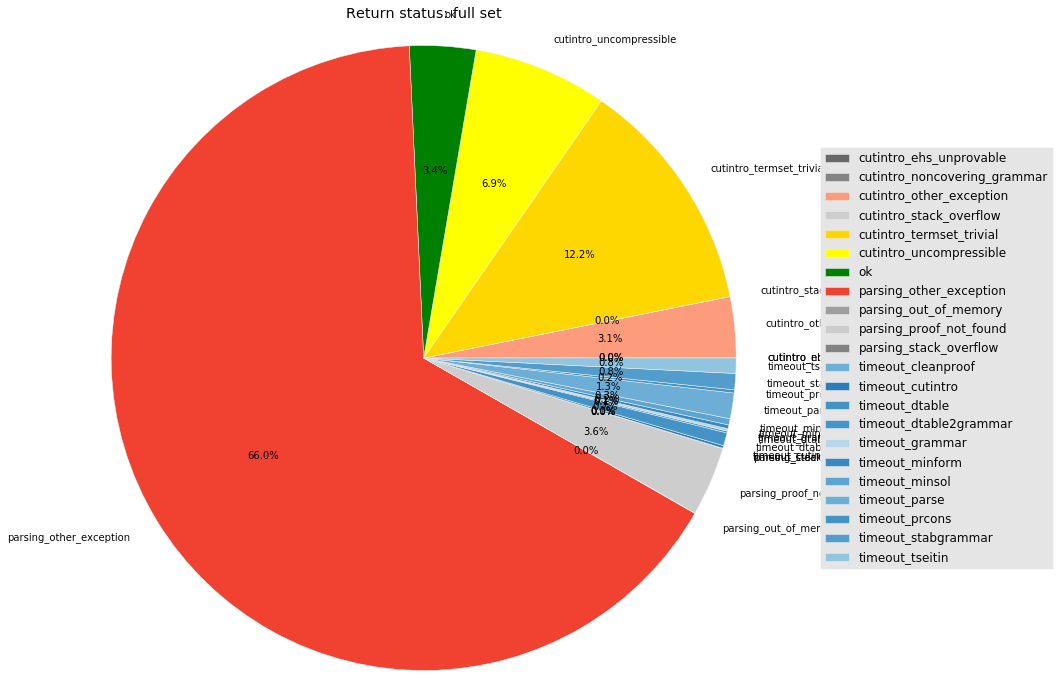

In [11]:
plot_status(data.groupby('status').size(), figsize=(14,12), title='Return status: full set')

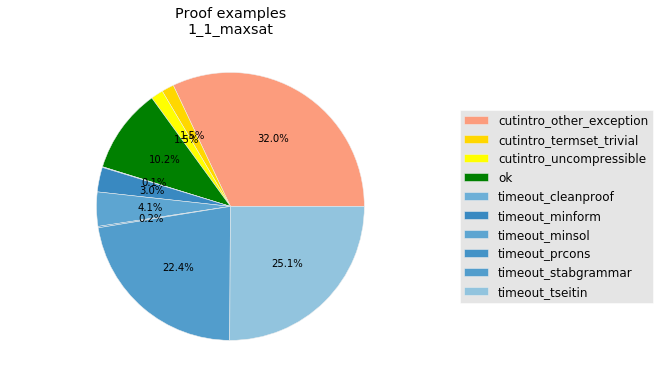

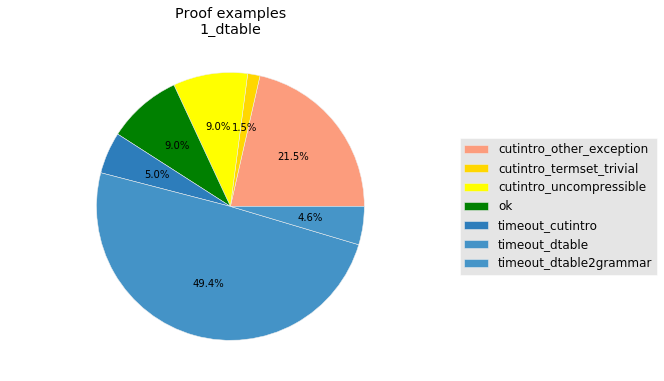

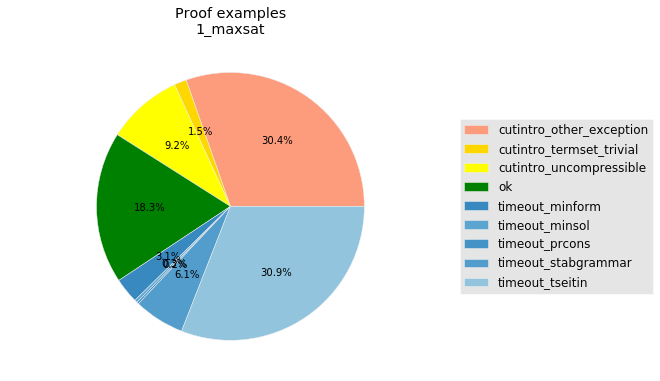

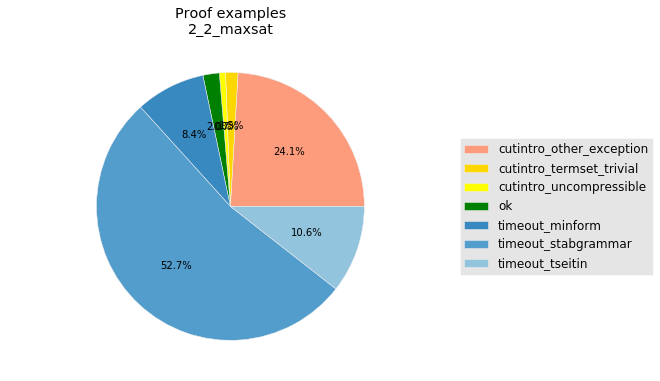

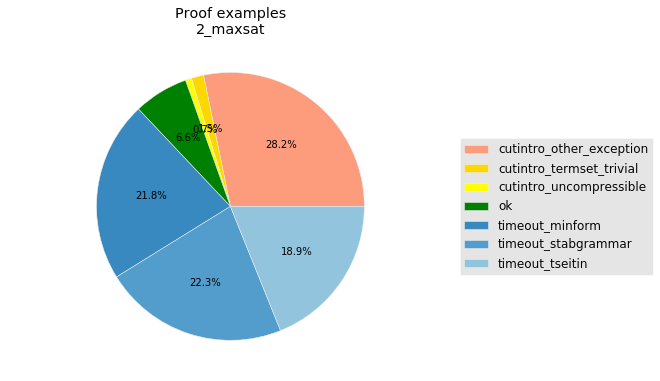

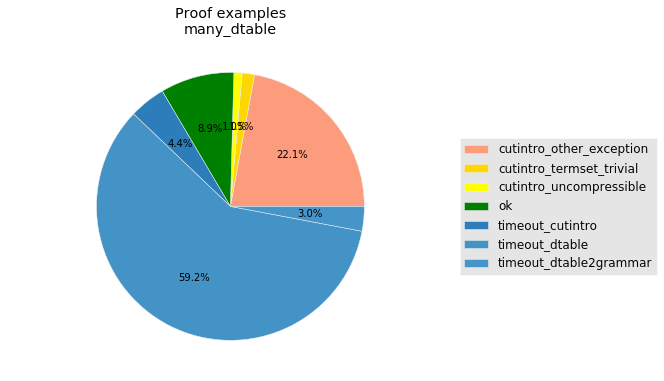

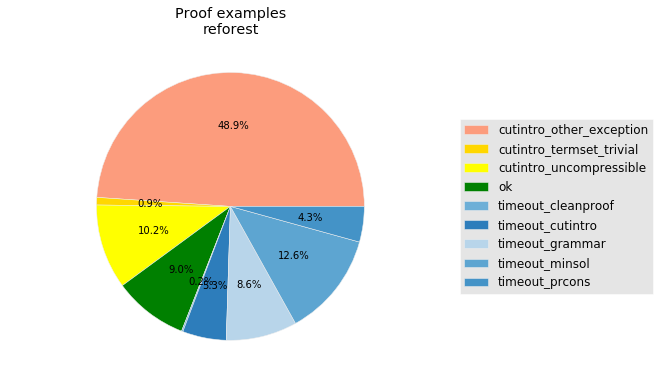

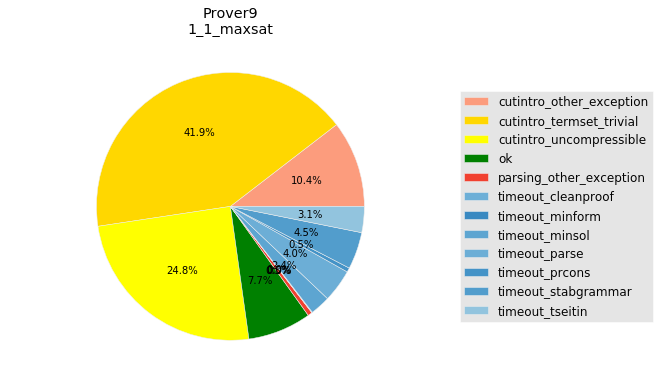

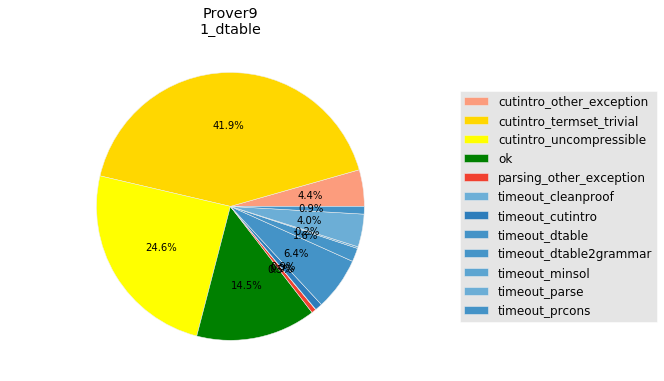

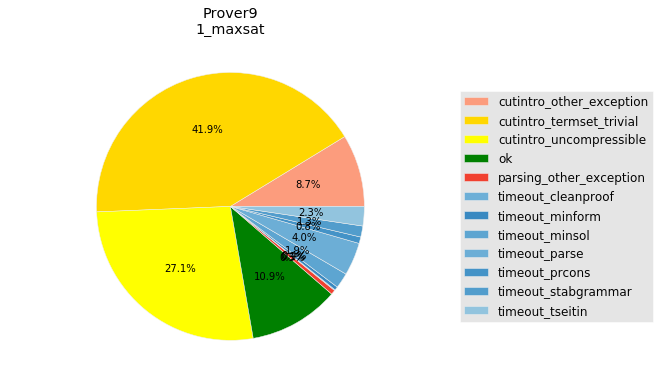

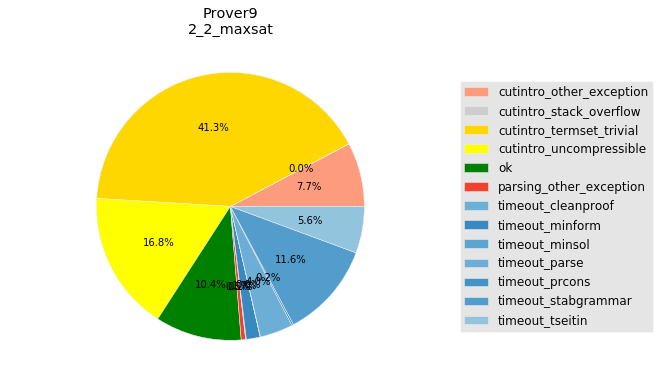

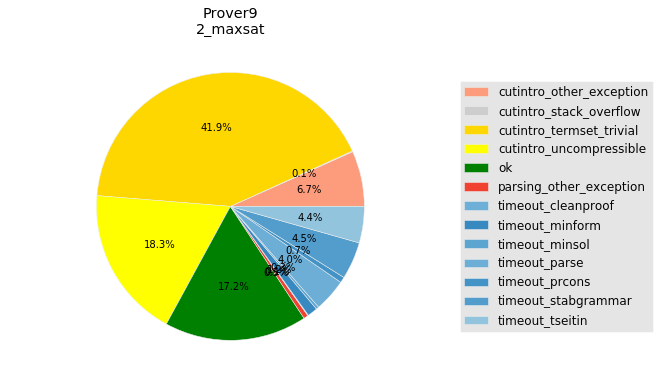

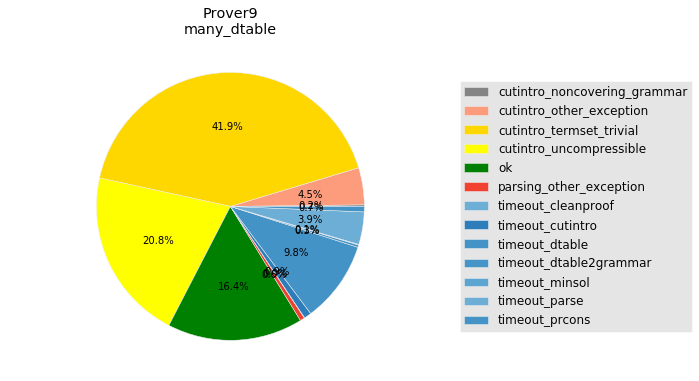

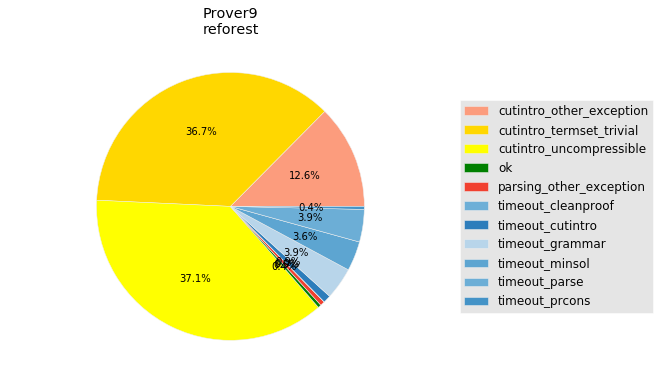

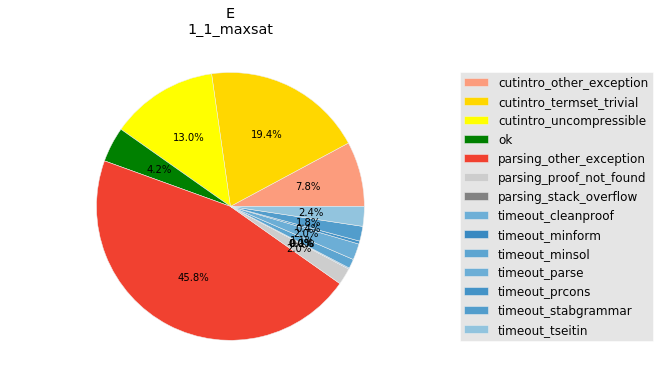

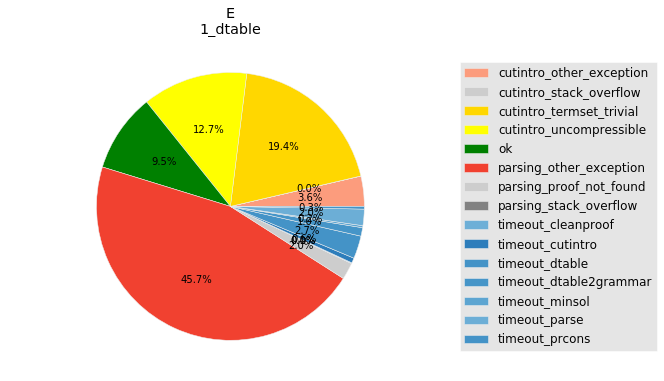

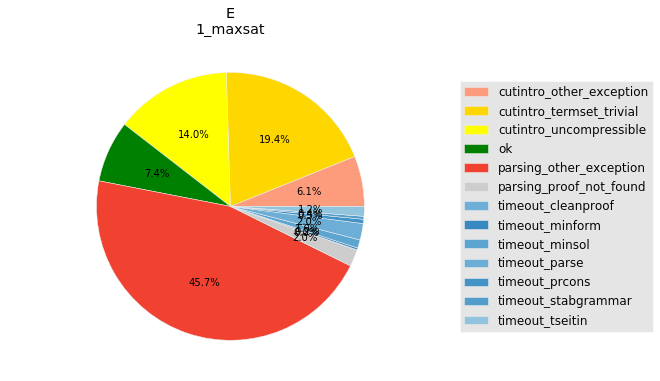

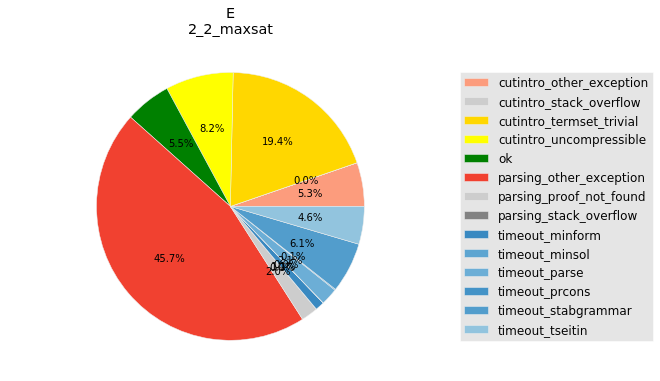

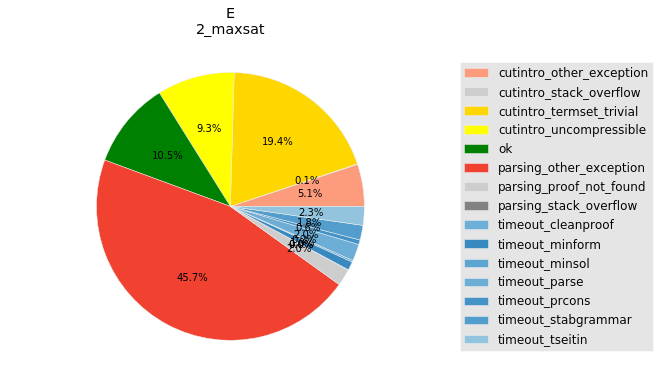

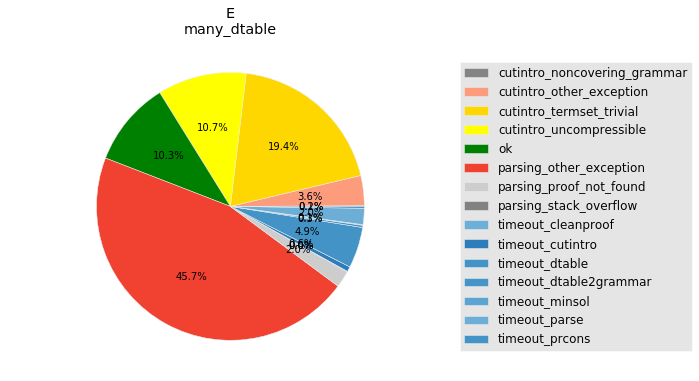

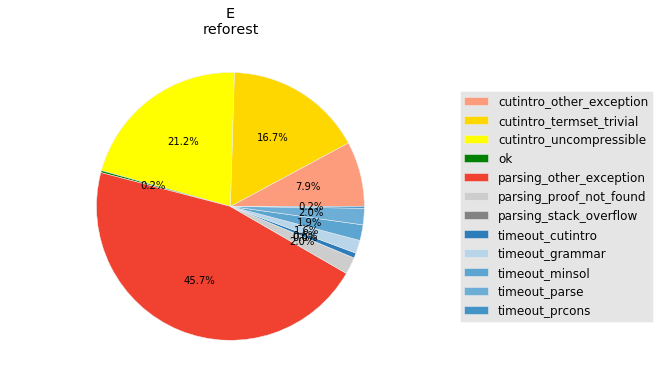

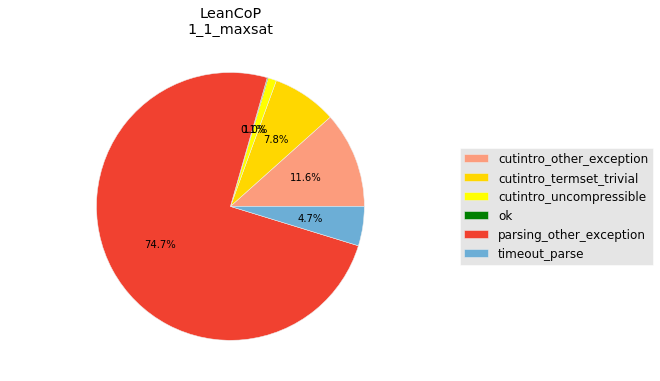

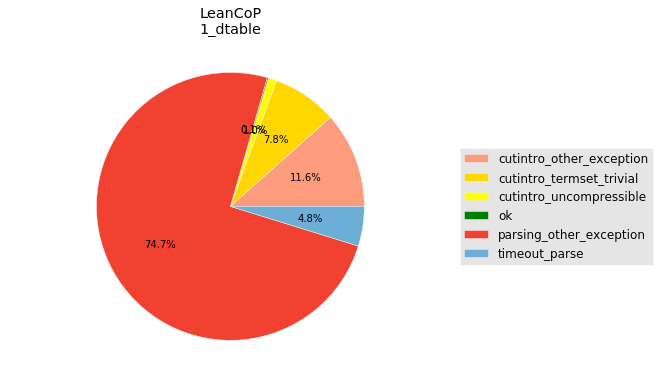

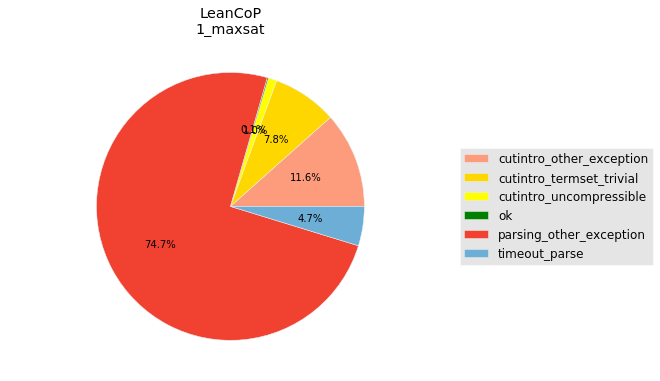

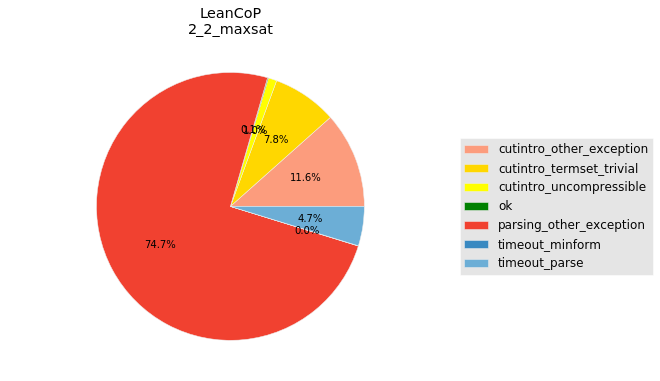

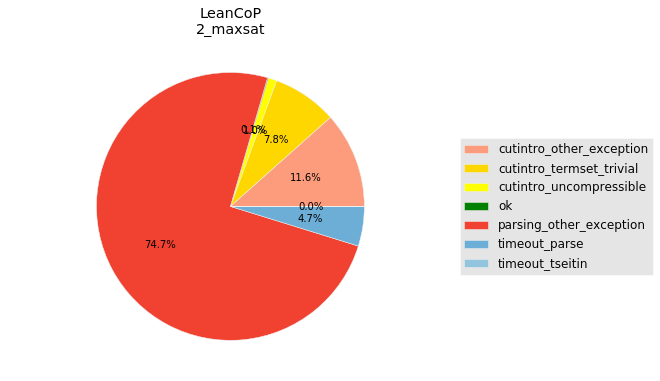

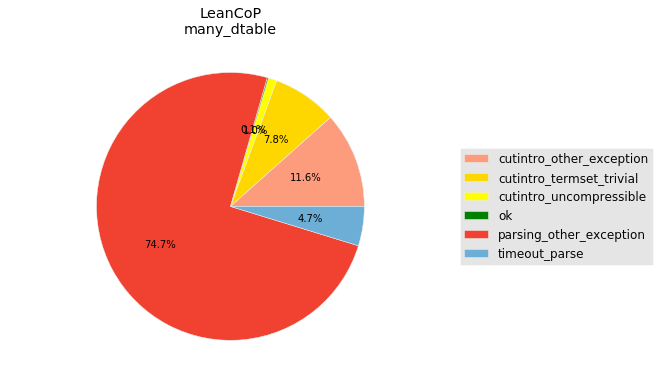

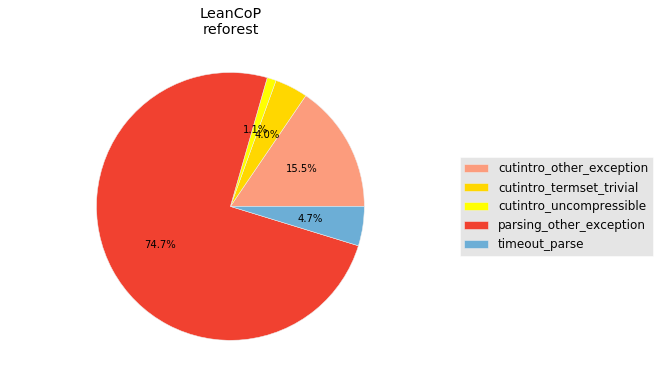

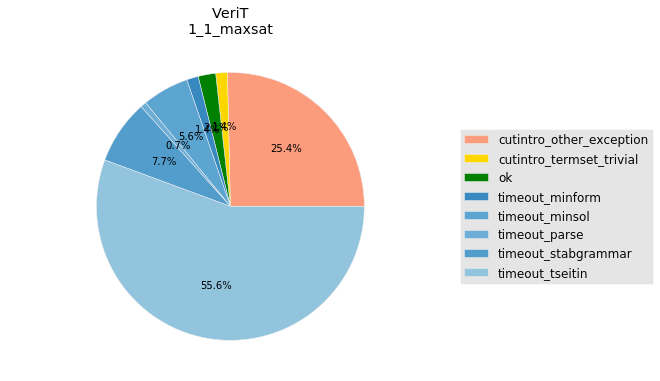

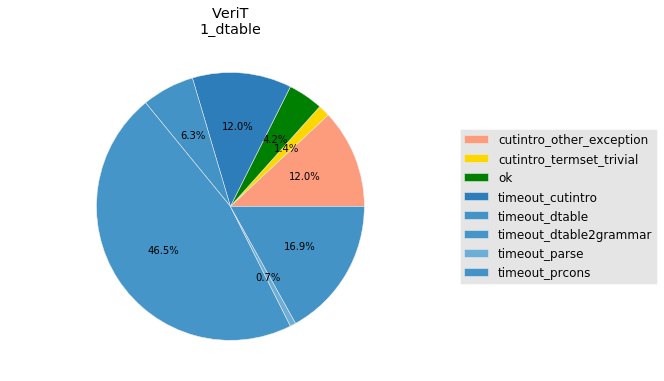

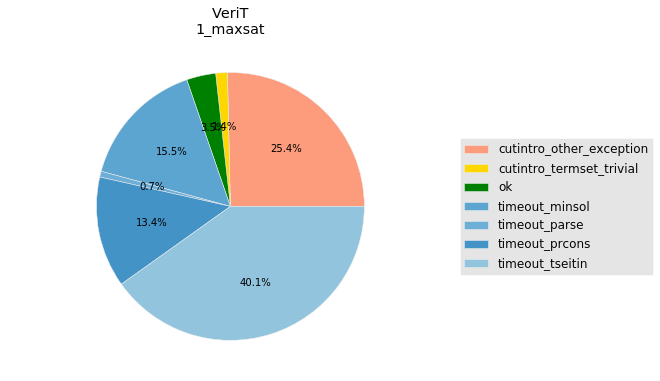

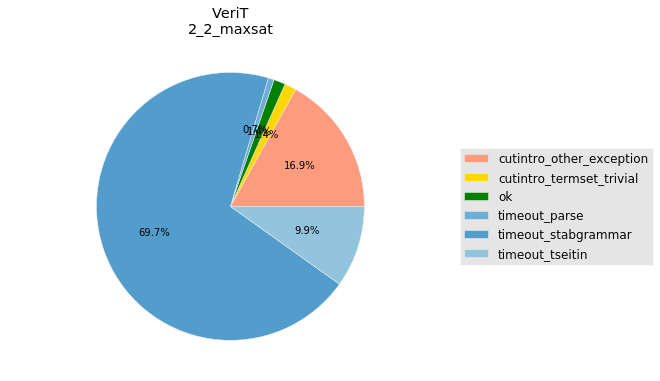

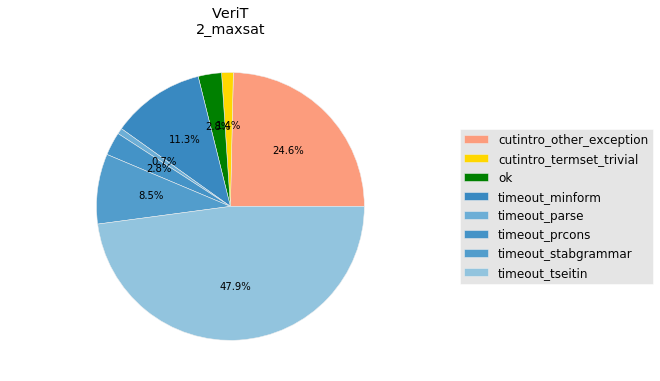

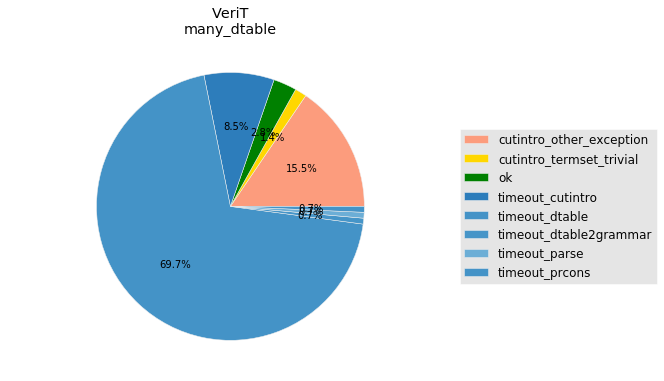

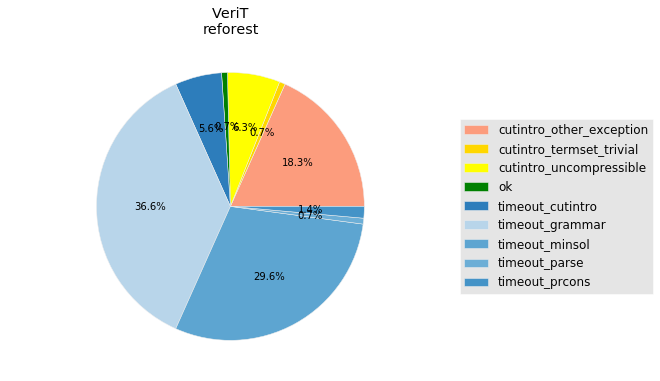

In [12]:
for dbi, db in dbs.items():
    for method in methods:
        subdata = data[(data.db==dbi) & (data.method==method)].groupby('status').size()
        plot_status(subdata, title='{0}\n{1}'.format(db,method), labels=None, figsize=(8,6))
        plt.show()

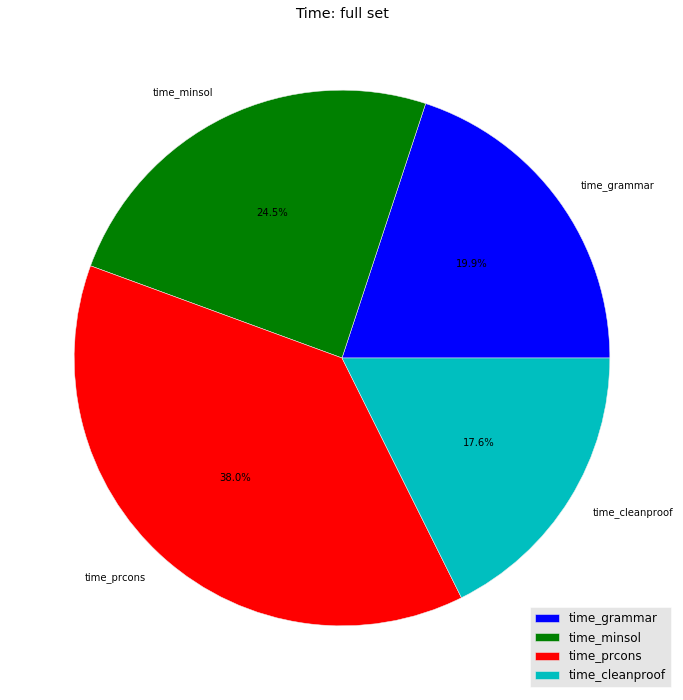

In [13]:
timecols = ['time_grammar', 'time_minsol', 'time_prcons', 'time_cleanproof']
plt.axis('equal')
data[timecols].mean().plot(kind='pie', figsize=(12,12), autopct='%1.1f%%',
                           title='Time: full set', legend=True).set_ylabel('')

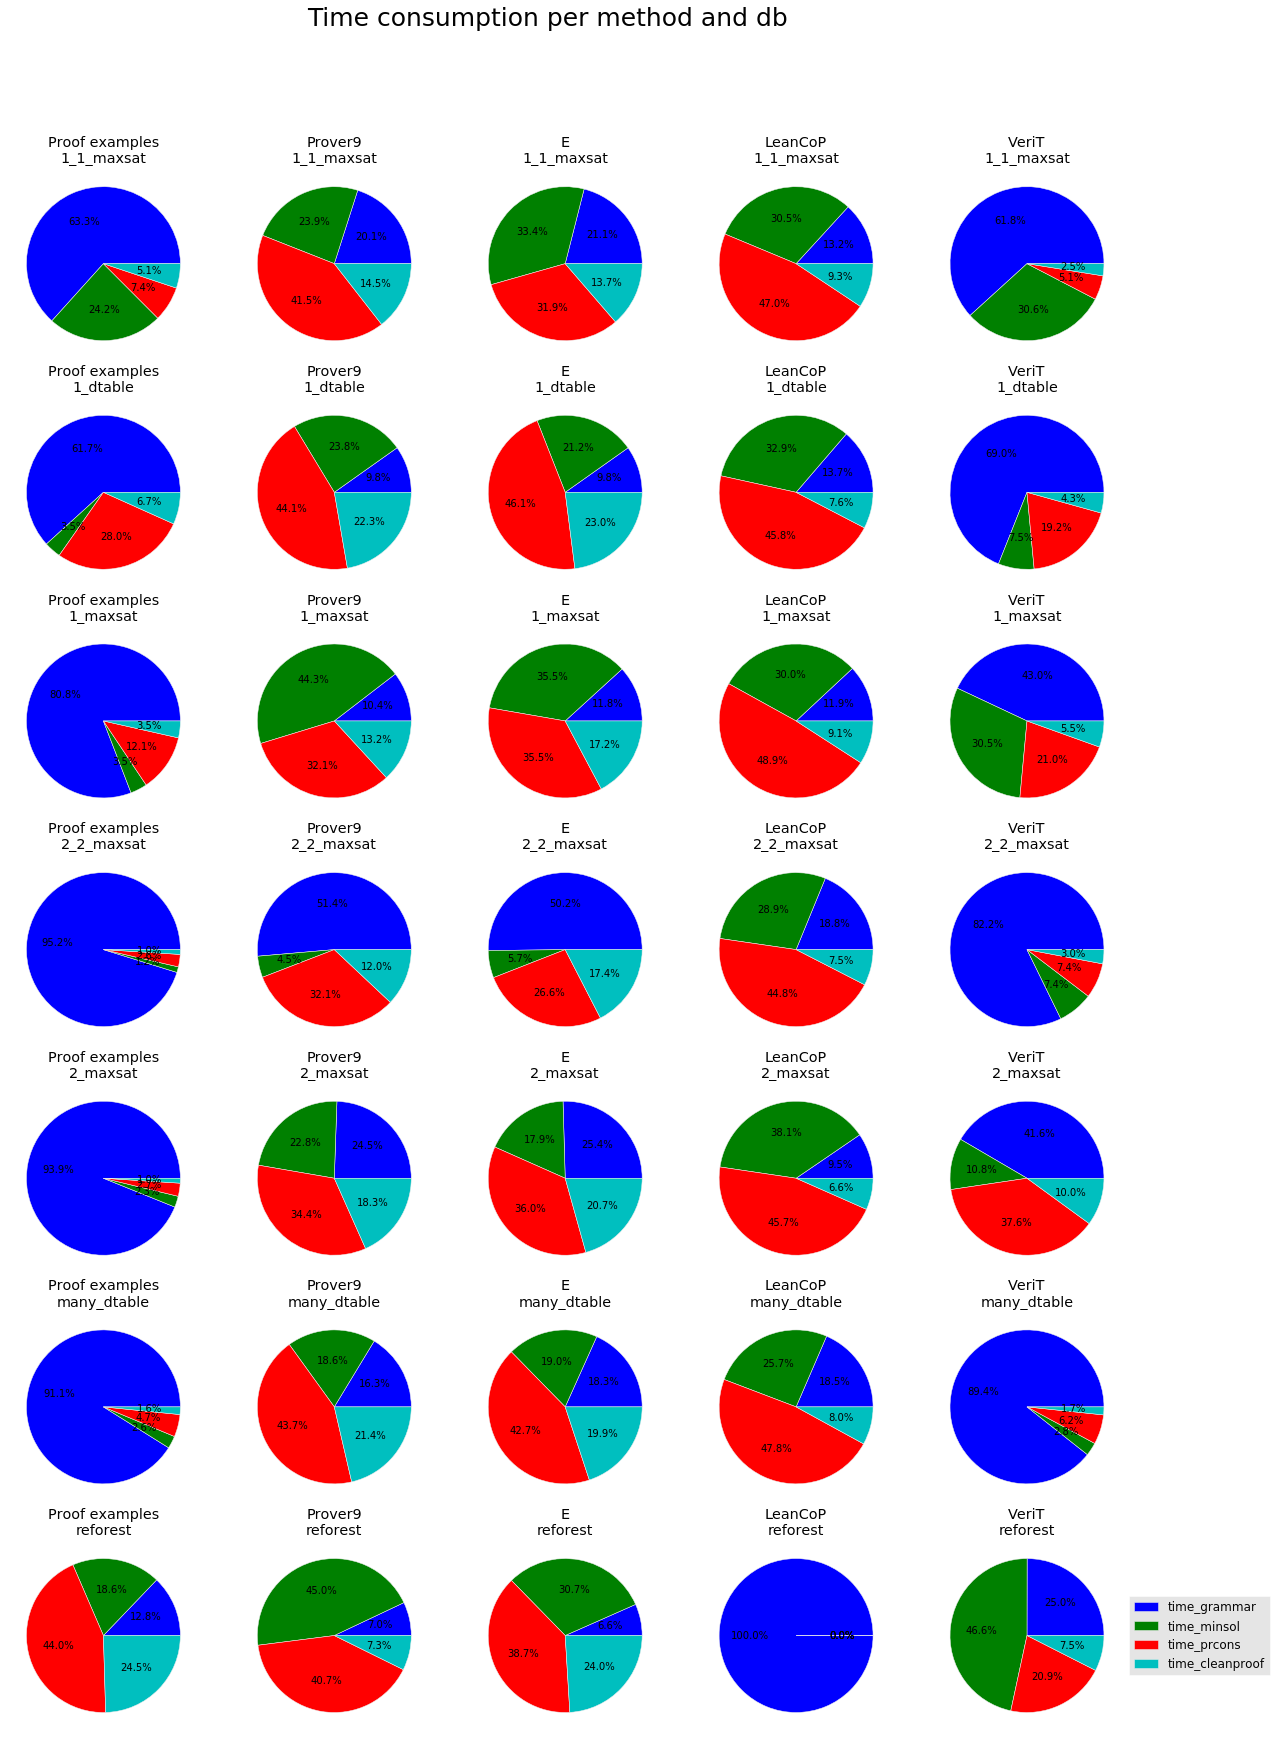

In [14]:
xsize, ysize = len(dbs.items()), len(methods)
plt.figure(1, figsize=(4*xsize,4*ysize))
plt.suptitle('Time consumption per method and db', fontsize=25)
for i, method in enumerate(methods):
    for j, (dbi, db) in enumerate(dbs.items()):
        plt.subplot(ysize, xsize, i*xsize + j + 1)
        plt.axis('equal')
        data[(data.db==dbi) & (data.method==method)][timecols].mean() \
            .plot(kind='pie', autopct='%1.1f%%', labels=None,
                  title='{0}\n{1}'.format(db,method)).set_ylabel('')
plt.legend(timecols, loc='center left', bbox_to_anchor=(1, 0.5))

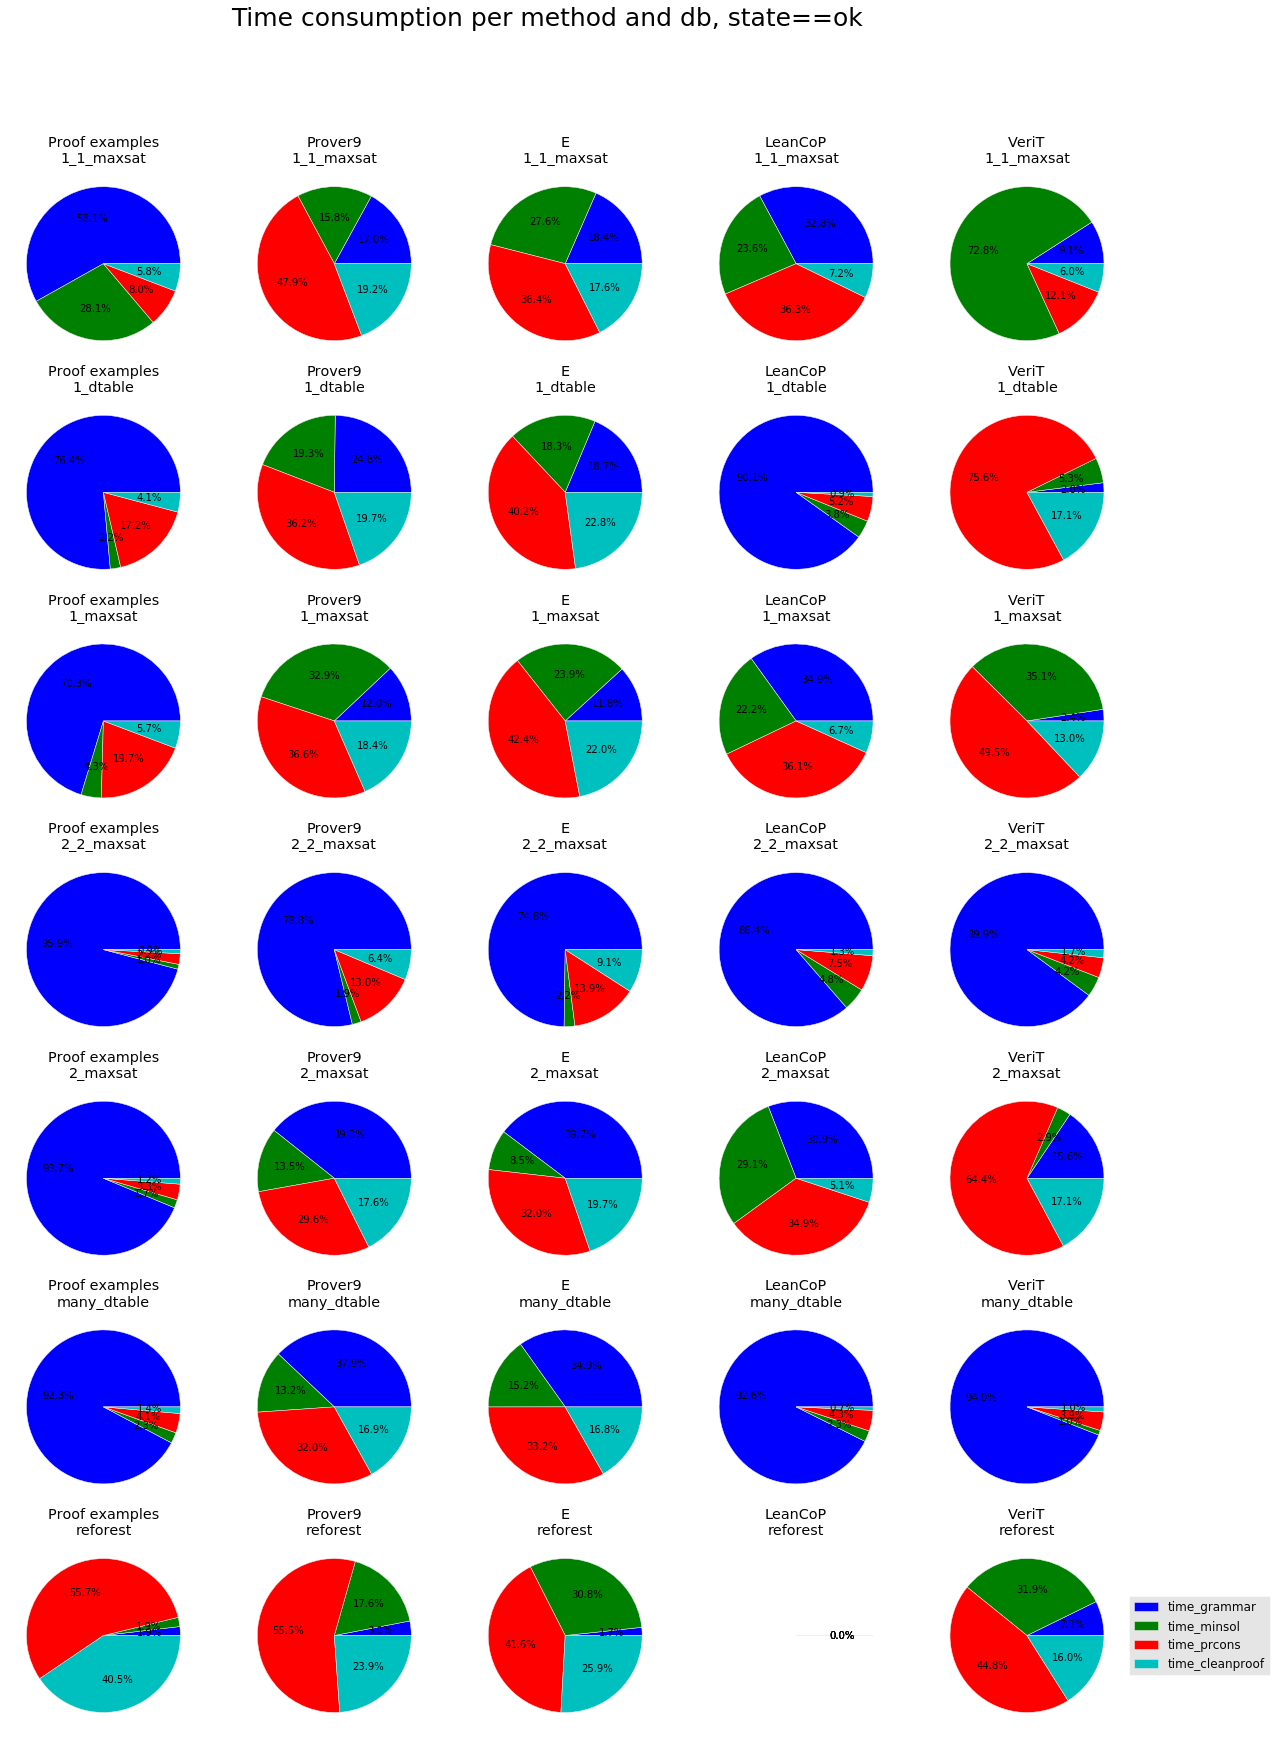

In [15]:
xsize, ysize = len(dbs.items()), len(methods)
plt.figure(1, figsize=(4*xsize,4*ysize))
plt.suptitle('Time consumption per method and db, state==ok', fontsize=25)
for i, method in enumerate(methods):
    for j, (dbi, db) in enumerate(dbs.items()):
        plt.subplot(ysize, xsize, i*xsize + j + 1)
        plt.axis('equal')
        ax = data[(data.db==dbi) & (data.method==method) & (data.status=='ok')][timecols].mean() \
            .plot(kind='pie', autopct='%1.1f%%', labels=None,
                  title='{0}\n{1}'.format(db,method))
        ax.set_ylabel('')
plt.legend(timecols, loc='center left', bbox_to_anchor=(1, 0.5))

In [16]:
data['status'].value_counts()

parsing_other_exception         643610
cutintro_termset_trivial        119178
cutintro_uncompressible          67702
parsing_proof_not_found          34840
ok                               33375
cutintro_other_exception         30620
timeout_parse                    12930
timeout_stabgrammar               8141
timeout_tseitin                   7702
timeout_dtable                    6553
timeout_minsol                    3144
timeout_minform                   1944
timeout_prcons                    1617
timeout_cutintro                  1308
timeout_grammar                   1218
timeout_dtable2grammar             908
parsing_out_of_memory              224
timeout_cleanproof                 147
parsing_stack_overflow              97
cutintro_noncovering_grammar        84
cutintro_stack_overflow             44
cutintro_ehs_unprovable             15
Name: status, dtype: int64

In [17]:
# Different grammar sizes between different methods: one cut with one quantifier
data_dtable = data[(data.method == '1_dtable') & data.grammar_size]
data_maxsat = data[(data.method == '1_maxsat') & data.grammar_size]

merged = pd.merge(data_dtable, data_maxsat, on=['file'], suffixes=('_dtable', '_maxsat'))
merged[merged.grammar_size_dtable != merged.grammar_size_maxsat] \
    [['file', 'grammar_size_dtable', 'grammar_size_maxsat']]

,file,grammar_size_dtable,grammar_size_maxsat
66,SquareEdges2DimExampleProof(10),19,16
67,SquareEdges2DimExampleProof(11),20,16
68,SquareEdges2DimExampleProof(12),21,16
69,SquareEdges2DimExampleProof(13),23,18
70,SquareEdges2DimExampleProof(14),24,18
71,SquareEdges2DimExampleProof(15),25,18
72,SquareEdges2DimExampleProof(16),26,18
73,SquareEdges2DimExampleProof(17),28,20
76,SquareEdges2DimExampleProof(6),13,12
77,SquareEdges2DimExampleProof(7),15,14


In [18]:
# Different grammar sizes between different methods: one cut with multiple quantifiers
data_dtable = data[(data.method == 'many_dtable') & data.grammar_size]
data_maxsat = data[(data.method == '2_maxsat') & data.grammar_size]

merged = pd.merge(data_dtable, data_maxsat, on=['file'], suffixes=('_dtable', '_maxsat'))
merged[merged.grammar_size_dtable != merged.grammar_size_maxsat] \
    [['file', 'grammar_size_dtable', 'grammar_size_maxsat']]

,file,grammar_size_dtable,grammar_size_maxsat
0,FactorialFunctionEqualityExampleProof(3),31,26
1,FactorialFunctionEqualityExampleProof(4),36,27
2,FactorialFunctionEqualityExampleProof(5),41,28
3,FactorialFunctionEqualityExampleProof2(10),24,16
4,FactorialFunctionEqualityExampleProof2(11),26,17
5,FactorialFunctionEqualityExampleProof2(2),11,10
6,FactorialFunctionEqualityExampleProof2(3),13,11
7,FactorialFunctionEqualityExampleProof2(4),15,12
8,FactorialFunctionEqualityExampleProof2(5),17,13
9,FactorialFunctionEqualityExampleProof2(6),18,14


In [19]:
# Better compression with 2x2 quantifiers than 1x2 quantifiers or 2x1 quantifiers
data_1x2 = data[(data.method == '2_maxsat') & data.grammar_size]
data_2x1 = data[(data.method == '1_1_maxsat') & data.grammar_size]
data_2x2 = data[(data.method == '2_2_maxsat') & data.grammar_size]

merged = data_1x2.merge(data_2x1, on='file', suffixes=('_1x2', '_2x1')) \
    .merge(data_2x2, on='file')
merged[(merged.grammar_size < merged.grammar_size_1x2) & (merged.grammar_size < merged.grammar_size_2x1)] \
    [['file', 'grammar_size', 'grammar_size_2x1', 'grammar_size_1x2']]

,file,grammar_size,grammar_size_2x1,grammar_size_1x2
57,proofs/Solutions/ALG/ALG440-1/E---1.9.1.UNS-CRf.s,19,21,20
58,proofs/Solutions/ALG/ALG440-1/E---FNT-1.9.1.UN...,19,21,20
59,proofs/Solutions/ALG/ALG440-1/ET---0.2.UNS-CRf.s,21,23,24
60,proofs/Solutions/ALG/ALG440-1/Prover9---1109a....,21,23,23
61,proofs/Solutions/ALG/ALG440-1/Vampire---4.0.UN...,21,23,23
79,proofs/Solutions/BOO/BOO012-2/Prover9---1109a....,16,19,17
93,proofs/Solutions/BOO/BOO016-1/Vampire---4.0.UN...,21,25,23
166,proofs/Solutions/COM/COM008+1/Prover9---1109a....,20,23,21
167,proofs/Solutions/COM/COM008+2/Prover9---1109a....,18,21,19
215,proofs/Solutions/FLD/FLD008-4/SPASS---3.7.UNS-...,19,21,20


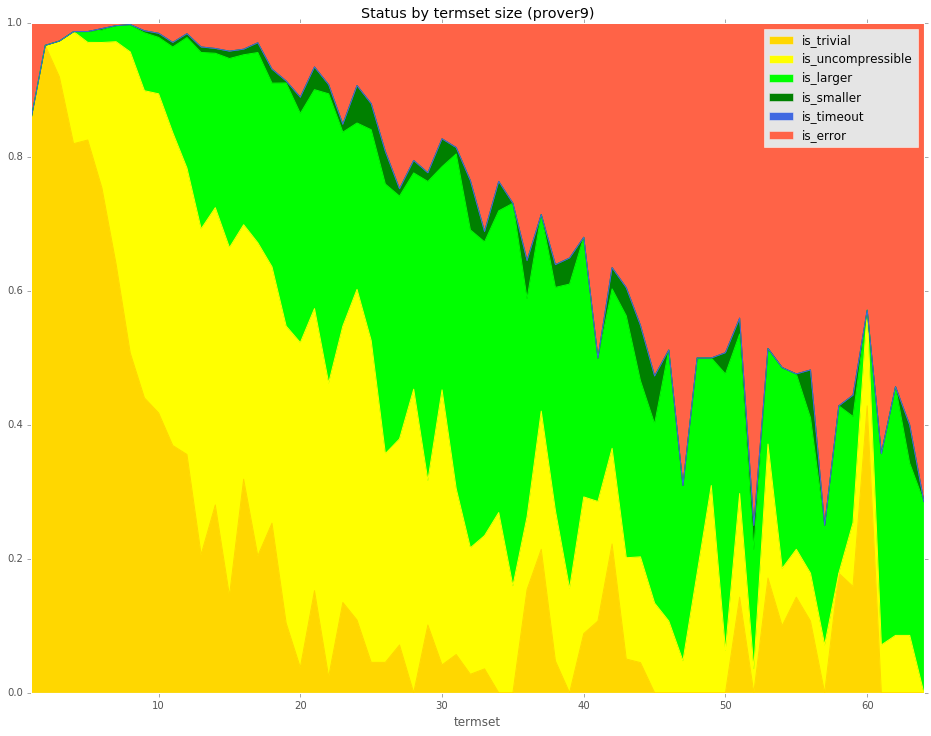

In [20]:
data['is_smaller'] = (data.status=='ok') & (data.ehs_resinf < data.resinf_input)
data['is_larger'] = (data.status=='ok') & (data.ehs_resinf >= data.resinf_input)
data['is_trivial'] = data.status.str.endswith('termset_trivial')
data['is_uncompressible'] = data.status.str.endswith('uncompressible')
data['is_timeout'] = data.status.str.endswith('timeout')
data['is_error'] = ~data.is_smaller & ~data.is_larger & ~data.is_trivial & ~data.is_uncompressible & ~data.is_timeout

data[(data.termset<65)&(data.db==1)].groupby('termset').mean() \
    [['is_trivial', 'is_uncompressible', 'is_larger', 'is_smaller', 'is_timeout', 'is_error']] \
    .plot(kind='area', figsize=(16,12), ylim=(0,1), title='Status by termset size (prover9)',
          color=['gold', 'yellow', 'lime', 'green', 'royalblue', 'tomato'])

In [21]:
# Proofs with good compression of EHS/HS
data[data.ehs_resinf/data.hs_resinf < 0.2] \
    [['file', 'method', 'ehs_resinf', 'hs_resinf', 'resinf_input']]

,file,method,ehs_resinf,hs_resinf,resinf_input
538880,SumOfOnesF2ExampleProof(14),1_maxsat,49,358,NaN
820112,SumOfOnesF2ExampleProof(16),1_maxsat,53,459,NaN
14741,SumOfOnesF2ExampleProof(22),1_maxsat,67,911,NaN
7203,proofs/Solutions/ALG/ALG386-1/SNARK---20120808...,1_1_maxsat,4,22,31
7206,proofs/Solutions/ALG/ALG386-1/SNARK---20120808...,1_dtable,4,22,31
7207,proofs/Solutions/ALG/ALG386-1/SNARK---20120808...,2_2_maxsat,4,22,31
7204,proofs/Solutions/ALG/ALG386-1/SNARK---20120808...,2_maxsat,4,22,31
7205,proofs/Solutions/ALG/ALG386-1/SNARK---20120808...,many_dtable,4,22,31
790331,proofs/Solutions/GRP/GRP494-1/ET---0.2.UNS-CRf.s,1_dtable,118,614,36
790330,proofs/Solutions/GRP/GRP494-1/ET---0.2.UNS-CRf.s,many_dtable,118,614,36


In [22]:
# Proofs with good compression of EHS/input
data[data.ehs_resinf/data.resinf_input < 0.2] \
    [['file', 'method', 'ehs_resinf', 'hs_resinf', 'resinf_input']]

,file,method,ehs_resinf,hs_resinf,resinf_input
617053,proofs/Solutions/ALG/ALG380-1/SPASS---3.7.UNS-...,1_dtable,16,28,92
617056,proofs/Solutions/ALG/ALG380-1/SPASS---3.7.UNS-...,1_maxsat,16,28,92
617051,proofs/Solutions/ALG/ALG380-1/SPASS---3.7.UNS-...,2_maxsat,16,28,92
617052,proofs/Solutions/ALG/ALG380-1/SPASS---3.7.UNS-...,many_dtable,16,28,92
7203,proofs/Solutions/ALG/ALG386-1/SNARK---20120808...,1_1_maxsat,4,22,31
7206,proofs/Solutions/ALG/ALG386-1/SNARK---20120808...,1_dtable,4,22,31
7207,proofs/Solutions/ALG/ALG386-1/SNARK---20120808...,2_2_maxsat,4,22,31
7204,proofs/Solutions/ALG/ALG386-1/SNARK---20120808...,2_maxsat,4,22,31
7205,proofs/Solutions/ALG/ALG386-1/SNARK---20120808...,many_dtable,4,22,31
934691,proofs/Solutions/BOO/BOO011-4/Prover9---1109a....,many_dtable,5,5,40


In [23]:
# Proofs with blowup
data[data.ehs_resinf > 5*data.hs_resinf] \
    [['file', 'method', 'ehs_resinf', 'hs_resinf', 'resinf_input']]

,file,method,ehs_resinf,hs_resinf,resinf_input
477699,LinearEqExampleProof(10),reforest,160,11,NaN
448154,LinearEqExampleProof(11),1_1_maxsat,133,12,NaN
448159,LinearEqExampleProof(11),reforest,106,12,NaN
271717,LinearEqExampleProof(12),reforest,162,13,NaN
366995,LinearEqExampleProof(13),1_maxsat,138,14,NaN
366994,LinearEqExampleProof(13),reforest,119,14,NaN
562427,LinearEqExampleProof(14),reforest,296,15,NaN
730401,LinearEqExampleProof(15),1_1_maxsat,96,16,NaN
730406,LinearEqExampleProof(15),reforest,299,16,NaN
972228,LinearEqExampleProof(16),reforest,268,17,NaN


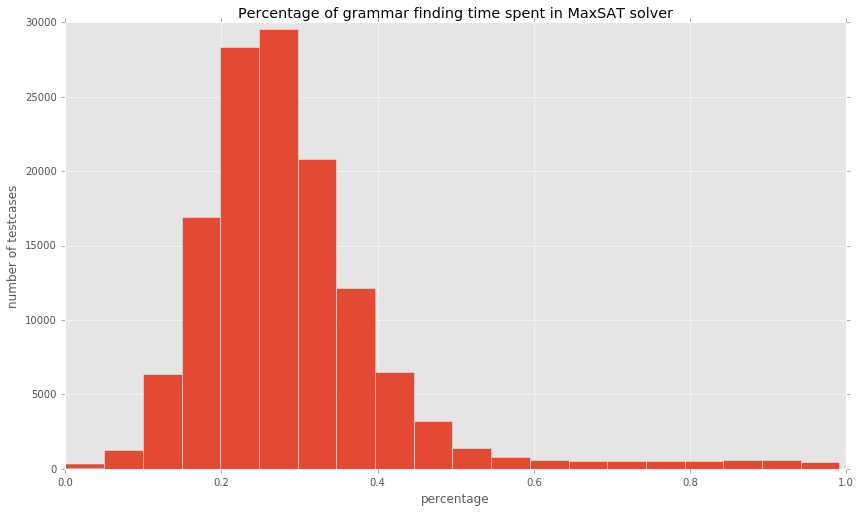

In [24]:
ax = (data.time_maxsat/data.time_grammar).dropna().plot(kind='hist', figsize=(14,8),
    title='Percentage of grammar finding time spent in MaxSAT solver', bins=20)
ax.set_xlabel('percentage')
ax.set_ylabel('number of testcases')